## APST2 : Projet Model Based Clustering

In [57]:
# Importation des librairies nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importation des données

data_pres = pd.read_csv('C:/Users/romai/Downloads/02-resultats-par-region.csv')

In [7]:
# Apercu du jeu de données

data_pres

,url,reg_code,reg_code_3,reg_name,num_tour,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,...,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_num_panneau,cand_nom,cand_prenom,cand_civil,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
0,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,1,ARTHAUD,Nathalie,Mme,1084,0.80,0.34
1,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,2,ROUSSEL,Fabien,M.,668,0.49,0.21
2,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,3,MACRON,Emmanuel,M.,18137,13.43,5.74
3,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,4,LASSALLE,Jean,M.,1033,0.76,0.33
4,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,5,LE PEN,Marine,Mme,24204,17.92,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,8,HIDALGO,Anne,Mme,1589,1.07,0.65
212,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,9,JADOT,Yannick,M.,4801,3.25,1.98
213,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,10,PÉCRESSE,Valérie,Mme,9363,6.33,3.85
214,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,11,POUTOU,Philippe,M.,1374,0.93,0.57


## Traitement des données

Tout d'abord, on va traiter et nettoyer le jeu de données. Pour cela, on regarde dans un premier temps les informations générales sur notre jeu de données

In [6]:
data_pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      216 non-null    object 
 1   reg_code                 216 non-null    int64  
 2   reg_code_3               216 non-null    int64  
 3   reg_name                 216 non-null    object 
 4   num_tour                 216 non-null    int64  
 5   inscrits_nb              216 non-null    int64  
 6   abstention_nb            216 non-null    int64  
 7   abstention_pourc         216 non-null    float64
 8   votants_nb               216 non-null    int64  
 9   blancs_nb                216 non-null    int64  
 10  blancs_pourc_inscrits    216 non-null    float64
 11  blancs_pourc_votants     216 non-null    float64
 12  nuls_nb                  216 non-null    int64  
 13  nuls_pourc_inscrits      216 non-null    float64
 14  nuls_pourc_votants       2

On regarde ensuite si il y a des valeurs manquantes.

In [10]:
data_pres.isna().sum()

url                        0
reg_code                   0
reg_code_3                 0
reg_name                   0
num_tour                   0
inscrits_nb                0
abstention_nb              0
abstention_pourc           0
votants_nb                 0
blancs_nb                  0
blancs_pourc_inscrits      0
blancs_pourc_votants       0
nuls_nb                    0
nuls_pourc_inscrits        0
nuls_pourc_votants         0
exprimes_nb                0
exprimes_pourc_inscrits    0
exprimes_pourc_votants     0
cand_num_panneau           0
cand_nom                   0
cand_prenom                0
cand_civil                 0
cand_nb_voix               0
cand_rapport_exprim        0
cand_rapport_inscrits      0
dtype: int64

Notre jeu de données ne possède aucune données manquantes. Regardons maintenant si il possède des doublons.

In [11]:
# On vérifier si il y a des doublons
duplicates = data_pres.duplicated()

# Afficher les lignes dupliquées
print(data_pres[duplicates])

Empty DataFrame
Columns: [url, reg_code, reg_code_3, reg_name, num_tour, inscrits_nb, abstention_nb, abstention_pourc, votants_nb, blancs_nb, blancs_pourc_inscrits, blancs_pourc_votants, nuls_nb, nuls_pourc_inscrits, nuls_pourc_votants, exprimes_nb, exprimes_pourc_inscrits, exprimes_pourc_votants, cand_num_panneau, cand_nom, cand_prenom, cand_civil, cand_nb_voix, cand_rapport_exprim, cand_rapport_inscrits]
Index: []

[0 rows x 25 columns]


In [17]:
data_t = data_pres.reset_index().pivot(index='reg_name', columns='cand_nom', values='cand_rapport_exprim')
data_t

cand_nom,ARTHAUD,DUPONT-AIGNAN,HIDALGO,JADOT,LASSALLE,LE PEN,MACRON,MÉLENCHON,POUTOU,PÉCRESSE,ROUSSEL,ZEMMOUR
reg_name,,,,,,,,,,,,
Auvergne-Rhône-Alpes,0.55,2.33,1.83,5.31,3.22,22.28,27.75,21.20,0.72,5.15,2.28,7.39
Bourgogne-Franche-Comté,0.71,2.58,1.77,4.02,3.31,27.35,26.31,18.56,0.85,5.12,2.27,7.15
Bretagne,0.66,1.78,2.21,6.19,2.97,19.53,32.79,20.65,1.01,4.70,2.59,4.91
Centre-Val de Loire,0.69,2.36,1.72,4.04,2.87,25.86,28.53,18.68,0.83,5.33,2.50,6.58
Corse,0.31,1.76,1.07,3.25,10.42,28.58,18.11,13.37,0.93,6.33,3.08,12.80
Grand Est,0.67,2.68,1.43,4.01,2.77,29.54,27.28,17.63,0.80,4.33,1.70,7.17
Guadeloupe,0.80,1.56,1.68,1.43,0.76,17.92,13.43,56.16,0.53,2.95,0.49,2.29
Guyane,0.83,2.00,1.49,2.62,1.44,17.66,14.22,50.59,1.29,2.78,0.69,4.39
Hauts-de-France,0.69,1.82,1.34,3.13,2.05,33.35,25.40,18.98,0.69,3.53,3.11,5.90


In [21]:
data_t.iloc[1,:]

cand_nom
ARTHAUD           0.71
DUPONT-AIGNAN     2.58
HIDALGO           1.77
JADOT             4.02
LASSALLE          3.31
LE PEN           27.35
MACRON           26.31
MÉLENCHON        18.56
POUTOU            0.85
PÉCRESSE          5.12
ROUSSEL           2.27
ZEMMOUR           7.15
Name: Bourgogne-Franche-Comté, dtype: float64

In [36]:
str('Région ') + data_t.index[0]

'Région Auvergne-Rhône-Alpes'

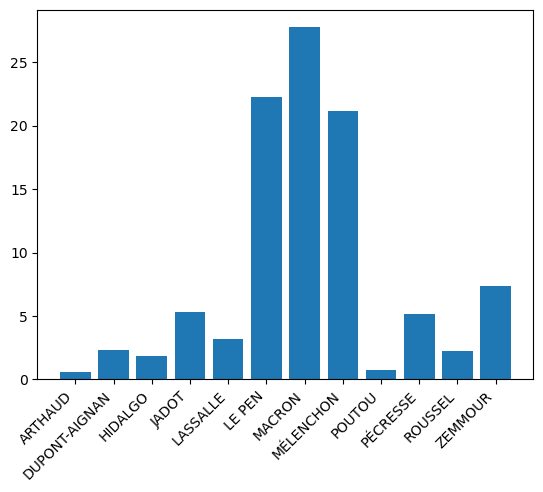

In [30]:
plt.bar(data_t.columns,data_t.iloc[0,:]);
plt.xticks(rotation=45, ha='right');

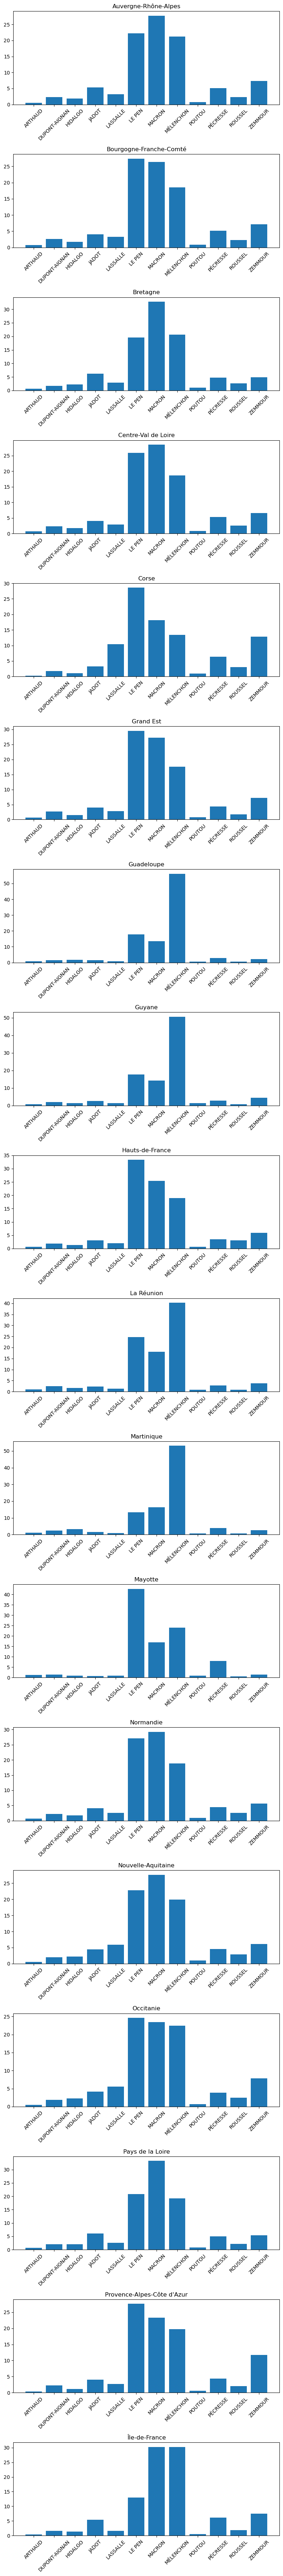

In [58]:
fig, axs = plt.subplots(nrows=len(data_t), ncols=1, figsize=(8, len(data_t)*4))
offset = np.arange(len(data_t.columns)+1)
# Création des barplots
for i,ligne in enumerate(data_t.index):
    axs[i].bar(data_t.columns, data_t.loc[ligne]);
    axs[i].set_title(ligne)
    axs[i].set_xticklabels(data_t.columns, rotation=45)
    
# Configuration des marges entre les sous-graphiques
fig.subplots_adjust(hspace=0.9)

# Affichage des barplots
plt.tight_layout()
plt.show()